Walmart Sales Exploration: I have taken data from Kaggle

In [16]:
%%time
## Essential library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages
from datetime import datetime  # Importing the datetime class from the datetime module
filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: total: 125 ms
Wall time: 191 ms


## Loading and preparing the data

Data Loading

Data Cleaning:
Handling Missing Values
Duplicate Values
Data Type Conversations
This stage involves preparing the dataset for analysis by addressing missing values and ensuring uniform data types.

Data Exploration:
Descriptive Statistics
Dataset Shape Analysis
This phase focuses on exploring the dataset's characteristics through statistical summaries and understanding its structure and dimensions.

In [17]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('Walmart_sales.csv')
    print("Dataset loaded successfully.")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print("Error: File not found. Please check the file path.")

except Exception as e:
    # Handle other exceptions
    print("An error occurred while loading the dataset:", e)

print();
collect();

Dataset loaded successfully.

CPU times: total: 109 ms
Wall time: 193 ms


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
%%time

# Rename columns to lowercase
df.columns = df.columns.str.lower()

# Verify the new column names
print("\nNew column names:")
print(df.columns)

print();
collect();


New column names:
Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

CPU times: total: 125 ms
Wall time: 168 ms


In [11]:
# Checking the null values in the dataset
df.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [13]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


In [14]:
df['date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

Observing Date column : it is in Date-Month-Year format

In [19]:
# Attempt to convert 'date' column to datetime format
try:
    df['date'] = pd.to_datetime(df['date'])
    print("All values in 'date' column are valid dates.")
except ValueError as e:
    print("Error:", e)
    print("There are non-date values present in the 'date' column.")

All values in 'date' column are valid dates.


In [13]:
df['date'].unique()

array(['2010-05-02T00:00:00.000000000', '2010-12-02T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-26T00:00:00.000000000',
       '2010-05-03T00:00:00.000000000', '2010-12-03T00:00:00.000000000',
       '2010-03-19T00:00:00.000000000', '2010-03-26T00:00:00.000000000',
       '2010-02-04T00:00:00.000000000', '2010-09-04T00:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-07-05T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-04-06T00:00:00.000000000',
       '2010-11-06T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-02-07T00:00:00.000000000',
       '2010-09-07T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-06-08T00:00:00.000000000', '2010-08-13

In [15]:
#Dataframe shape
df.shape

(6435, 8)

In [4]:
# Statistics about the data set
df.describe().style.background_gradient(cmap='bone_r')

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


### Feature Engineering

Date Features: Extracting additional information from the 'Date' column such as day, month, year, day of the week, and whether it's a holiday or not. This can provide seasonality information and holiday effects.

List of Numerical Features:
weekly sales
temperature
fuel price
cpi
unemployment

In [20]:
# Function to map dates to seasons
def date_to_season(date):
    # Extract month from date string and convert it to integer
    month = datetime.strptime(date, "%Y-%m-%d").month
    # Map months to seasons
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"
    
# Apply date_to_season function to create a new column
df["season"] = df["date"].apply(lambda x: date_to_season(x.strftime("%Y-%m-%d")))

In [22]:
# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Extract month name from the 'date' column
df['month_name'] = df['date'].dt.month_name()

# Extract day from the 'date' column
df['day'] = df['date'].dt.day

# Extract day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday) from the 'date' column
df['day_of_week'] = df['date'].dt.dayofweek

df.sample(5)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,season,year,month,month_name,day,day_of_week
1727,13,2010-04-23,1909330.77,0,55.66,2.936,126.471333,8.107,Spring,2010,4,April,23,4
4384,31,2011-11-25,1934099.65,1,56.43,3.236,218.113027,7.441,Autumn,2011,11,November,25,4
5123,36,2012-11-05,330518.34,0,76.55,3.764,220.407558,6.989,Autumn,2012,11,November,5,0
3059,22,2011-04-03,997353.15,0,33.52,3.437,137.501703,8.458,Spring,2011,4,April,3,6
4680,33,2012-03-02,256091.32,0,59.53,3.543,130.349677,7.603,Spring,2012,3,March,2,4


### EXPLORATORY DATA ANALYSIS(EDA)

Univariate Analysis:
Visualize the distribution of numerical variables using histograms or density plots.
Explore categorical variables using bar plots or count plots to understand their frequency distribution.


Bivariate Analysis:
Analyze relationships between pairs of variables using scatter plots (for numerical variables) or grouped bar plots (for categorical variables).
Calculate correlation coefficients between numerical variables to measure the strength and direction of linear relationships.
Visualizing distributions of variables (histograms, kernel density plots) Summary statistics (box plots, violin plots) Pairwise relationships (scatter plots, pair plots)

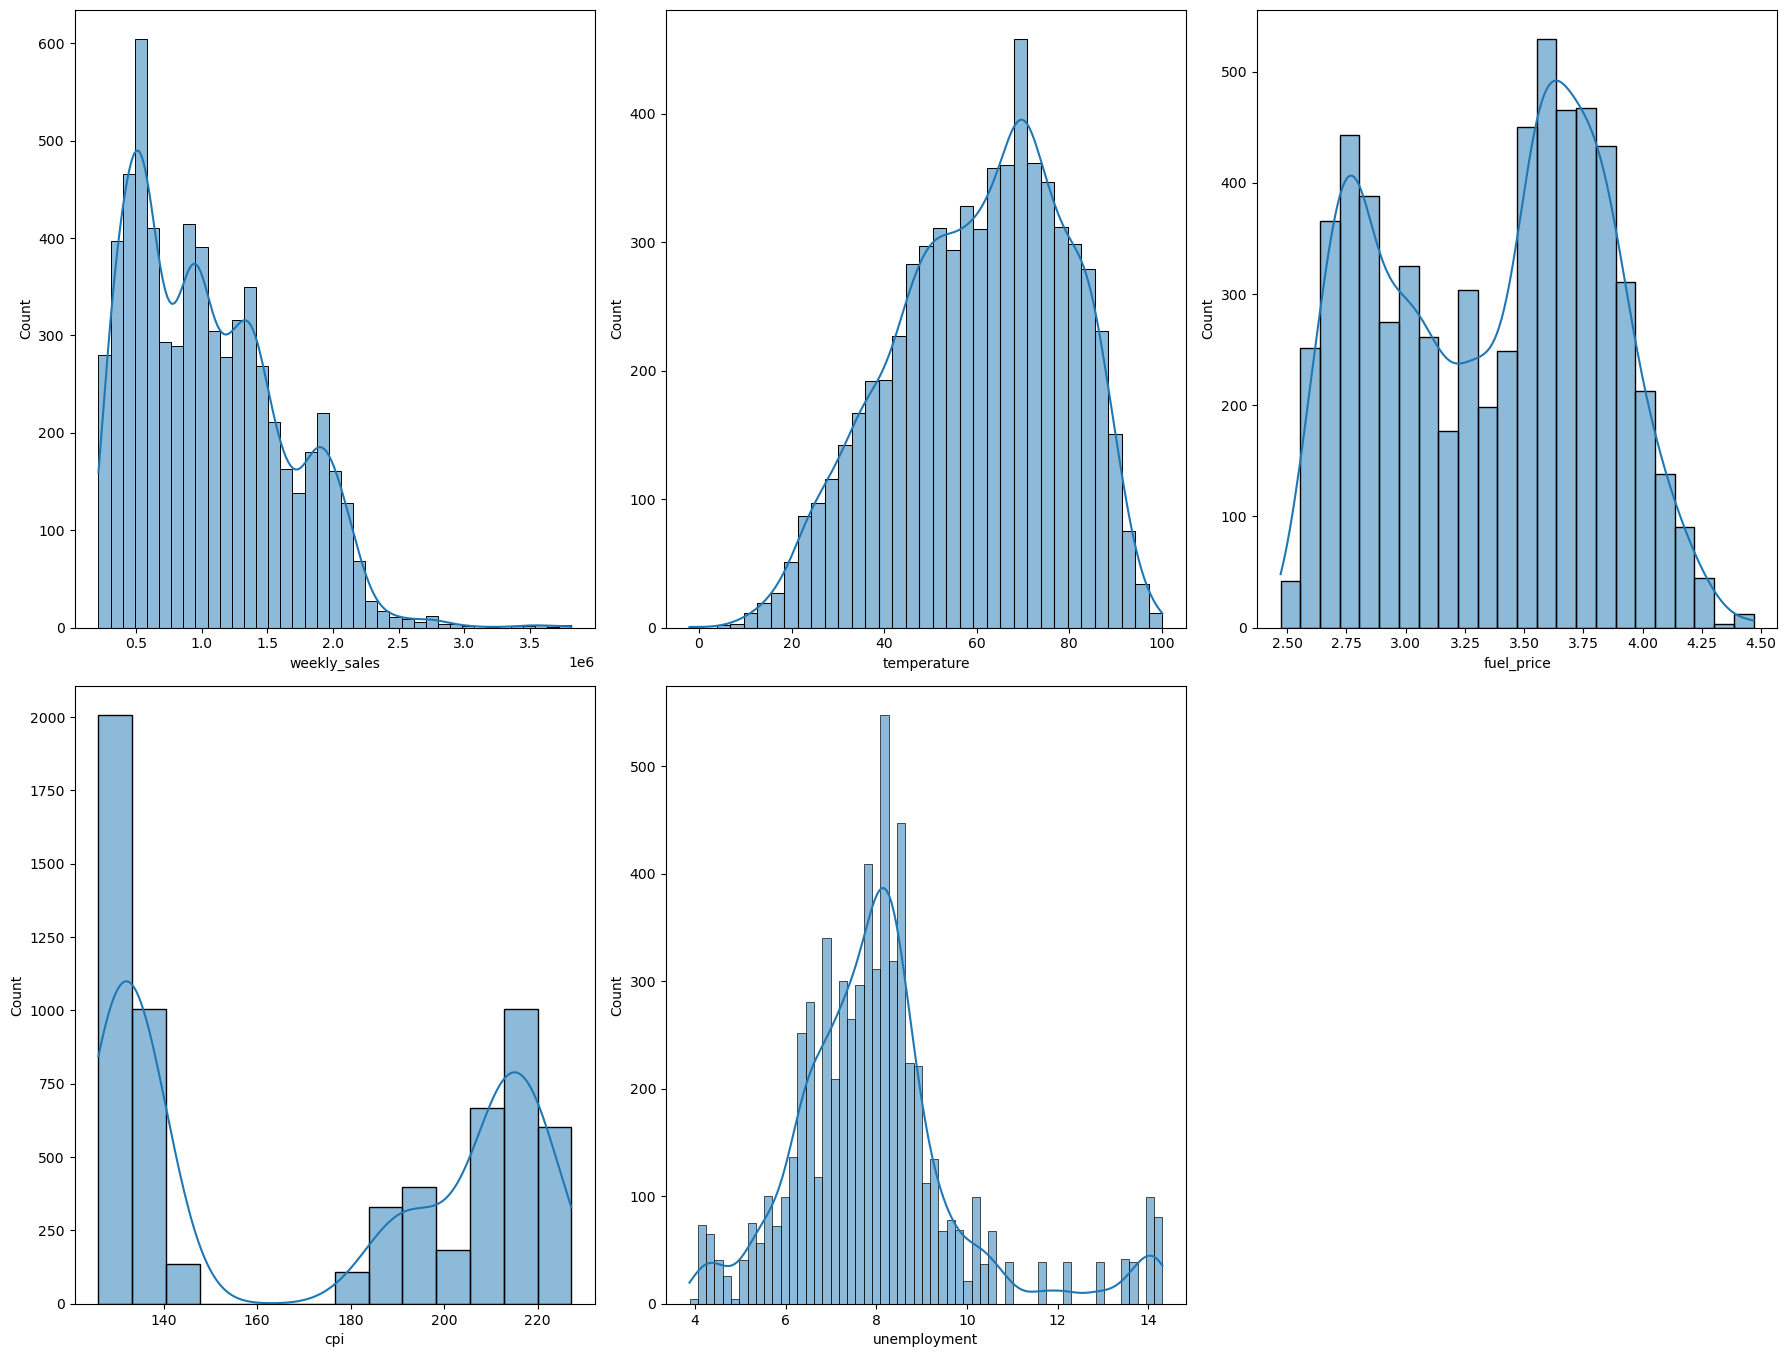

In [23]:
# List of features
features = ['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']

# Set the figure size
plt.figure(figsize=(18, 20))

# Loop through each column in your dataset
for i, col in enumerate(features):
    # Create subplots
    plt.subplot(3, 3, i+1)
    
    # Plot histogram for the current column
    sns.histplot(data=df, x=col, kde=True)

plt.tight_layout()
plt.show()

Conclusion

Weekly Sales: The histogram of weekly sales indicates a right-skewed distribution, suggesting that there are relatively fewer instances of very high sales compared to lower sales amounts. This could indicate occasional spikes in sales or a few high-performing periods.

Temperature and Unemployment: The histograms of temperature and unemployment show approximately normal distributions, indicating that the majority of the data points are centered around the mean with relatively few outliers. This suggests that these factors may follow typical patterns without significant deviations.

Fuel Price, CPI: The histograms of fuel price and CPI exhibit bimodal distributions, suggesting the presence of two distinct peaks or modes in the data. This could imply the existence of different market conditions or states within the dataset, potentially indicating varying economic situations or consumer behaviors.

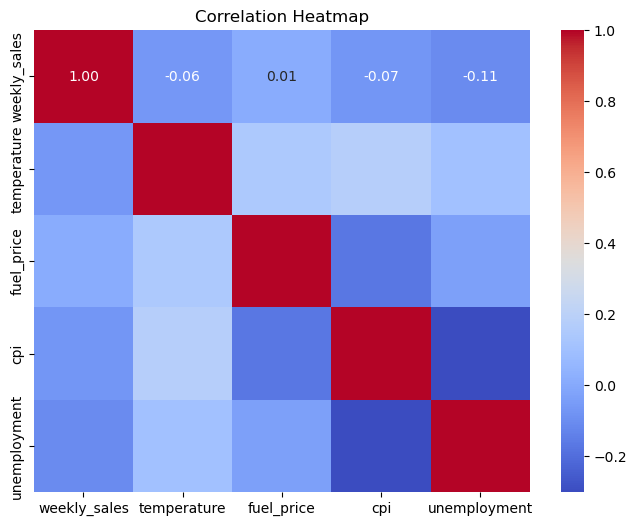

In [24]:
correlation_matrix = df[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Conclusion
Weekly sales have a weak negative correlation with temperature, fuel price, and unemployment. This means that as these variables increase, weekly sales tend to decrease slightly.
Weekly sales have a weak positive correlation with CPI. This means that as CPI increases, weekly sales tend to increase slightly.
Temperature has a weak positive correlation with fuel price, CPI, and unemployment.
Fuel price has a weak negative correlation with CPI.
CPI has a moderate negative correlation with unemployment.

In [26]:
pd.pivot_table(data = df,
              index = 'year',
              columns = 'season',
              values = 'weekly_sales',
              aggfunc = 'sum')

season,Autumn,Spring,Summer,Winter
year,,,,
2010,5.695973e+08,6.506499e+08,5.112405e+08,5.573984e+08
2011,6.682219e+08,5.982915e+08,5.527357e+08,6.289509e+08
2012,4.148012e+08,5.555655e+08,6.685873e+08,3.611788e+08


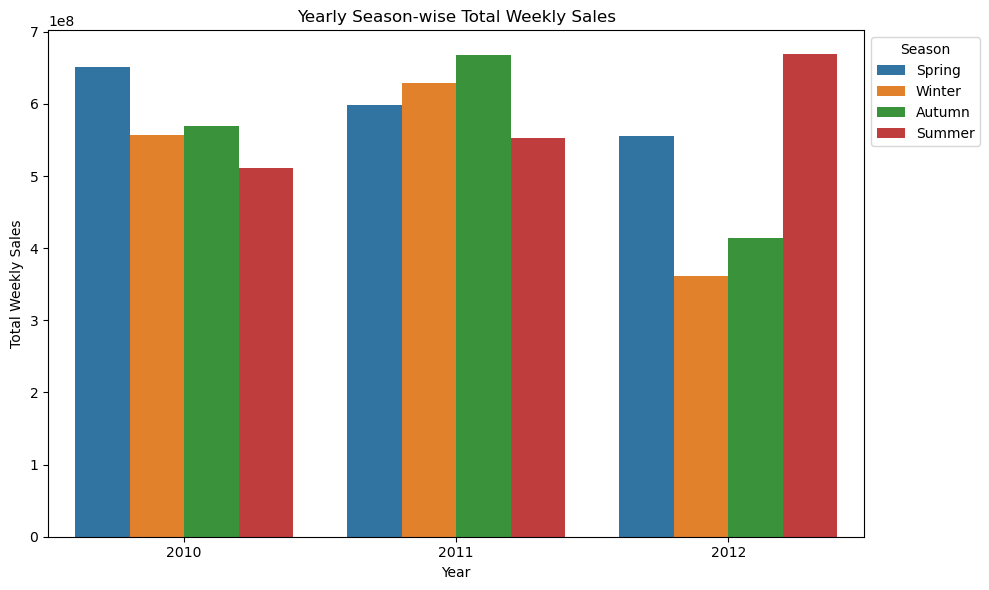

In [27]:
# Create a dictionary to store season-wise weekly sales for each year
seasonwise_weekly_sales = {}

# Iterate over unique seasons
for season in df['season'].unique():
    # Group by year and sum the weekly sales for the current season
    season_sales = df[df['season'] == season].groupby('year')['weekly_sales'].sum()
    # Store the season-wise weekly sales in the dictionary
    seasonwise_weekly_sales[season] = season_sales

# Create an empty list to store data
plot_data = []

# Populate the list with data
for season, sales in seasonwise_weekly_sales.items():
    for year, weekly_sales in sales.items():
        plot_data.append({'Year': year, 'Season': season, 'Weekly Sales': weekly_sales})

# Convert the list to a DataFrame
plot_data = pd.DataFrame(plot_data)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar plot using seaborn
sns.barplot(data=plot_data, x='Year', y='Weekly Sales', hue='Season', ax=ax, ci=None)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Weekly Sales')
ax.set_title('Yearly Season-wise Total Weekly Sales')
# Adjust legend position to prevent it from going outside the plot
ax.legend(title='Season', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Conclusion: Best Season by Year
2010: Spring
2011: Autumn
2012: Summer

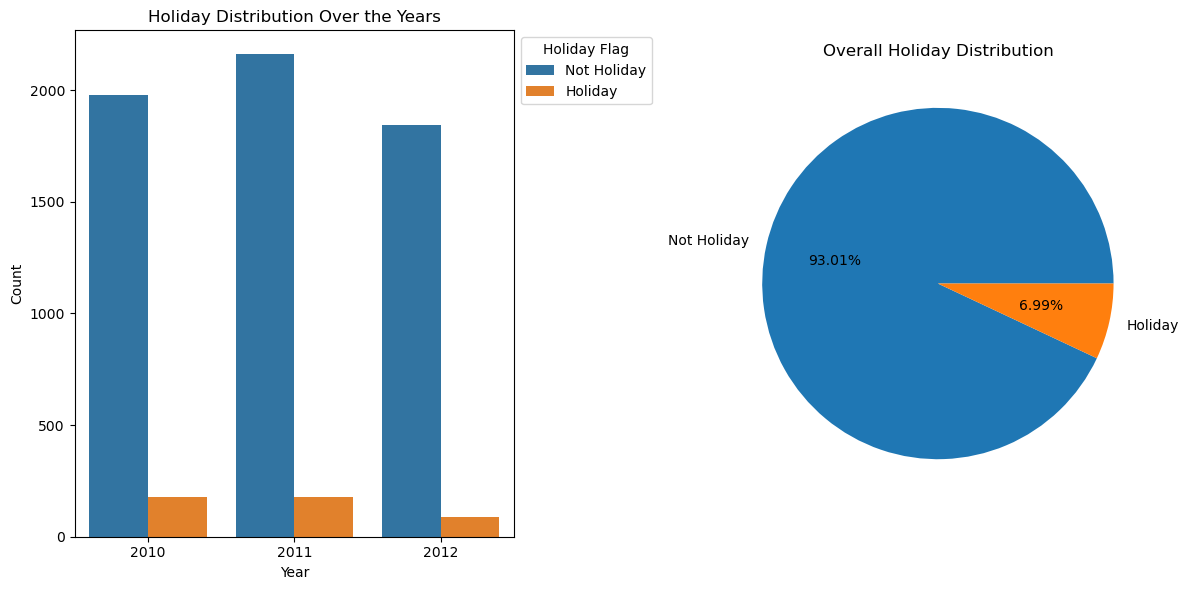

In [29]:
# Group by year and holiday_flag to get counts
holiday_counts = df.groupby(['year', 'holiday_flag']).size().unstack(fill_value=0).reset_index()

# Melt DataFrame to long format
holiday_counts_melted = pd.melt(holiday_counts, id_vars='year', var_name='Holiday Flag', value_name='Count')

# Plot using Seaborn
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
sns.barplot(data=holiday_counts_melted, x='year', y='Count', hue='Holiday Flag', ax=ax[0])
ax[0].set_title('Holiday Distribution Over the Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Get legend handles
handles, _ = ax[0].get_legend_handles_labels()

ax[0].legend(handles=handles, labels=['Not Holiday', 'Holiday'], title='Holiday Flag', loc='upper left', bbox_to_anchor=(1, 1))

ax[1].pie(df['holiday_flag'].value_counts().values, labels=['Not Holiday', 'Holiday'], autopct='%1.2f%%')
ax[1].set_title('Overall Holiday Distribution')

plt.tight_layout()
plt.show()

Conclusion
Based on the analysis of holiday distribution over the years, it appears to be a typical scenario, with holiday percentages varying across different years. The overall holiday percentage, calculated as 6.99%, indicates that holidays occur in a relatively small proportion of the observed data points. Further investigation into the specific trends and patterns within each year may provide additional insights into holiday occurrences and their impact.

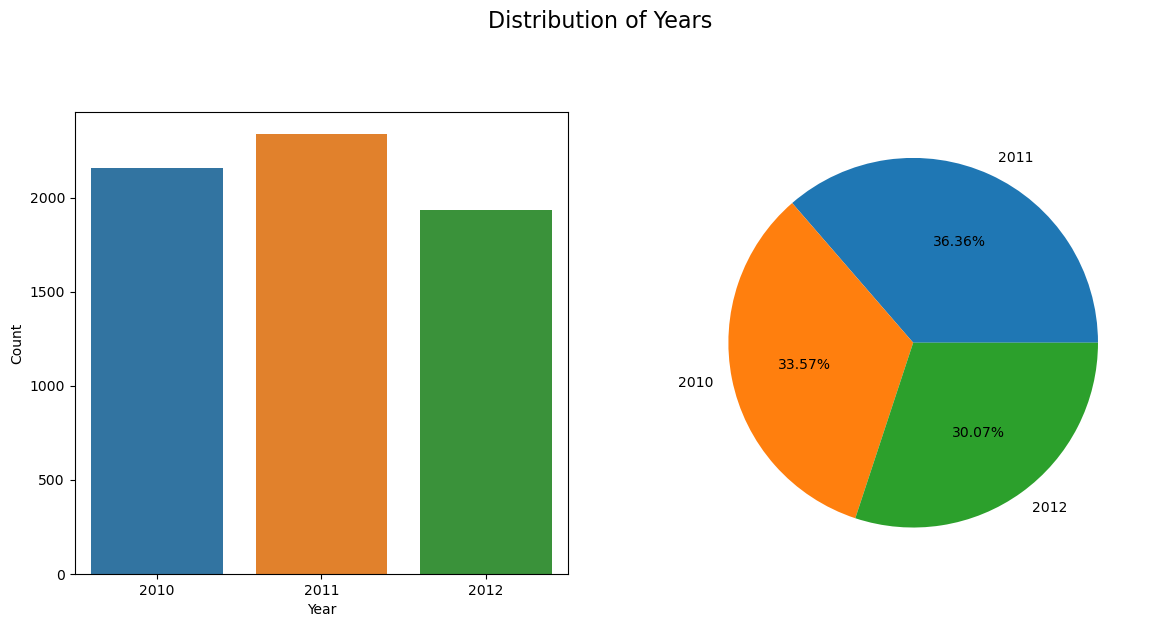

In [30]:
# Calculate the count of each year
year_counts = df['year'].value_counts()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for the distribution of years
sns.countplot(data=df, x='year', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Pie chart for the distribution of years
ax[1].pie(year_counts.values, labels=year_counts.index, autopct='%1.2f%%')

# Set a single title for the entire figure
plt.suptitle('Distribution of Years', fontsize=16, y=1.05)

plt.show()